In [4]:
import pandas as pd
df=pd.read_csv("Churn_Modelling.csv")


In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.duplicated().sum()

0

In [9]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [10]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [11]:
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [12]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)

In [13]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [14]:
df=pd.get_dummies(df,columns=["Geography","Gender"],drop_first=True)

In [15]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [16]:
X=df.drop(columns=["Exited"])
y=df["Exited"]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
X_train.shape

(8000, 11)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_sclaed=scaler.transform(X_test)

In [19]:
X_train_scaled

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [20]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [21]:
model=Sequential()
model.add(Dense(11,activation="relu",input_dim=11))
model.add(Dense(11,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

c:\Users\lucius seneca\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [24]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7198 - loss: 0.6140 - val_accuracy: 0.7987 - val_loss: 0.4710
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7916 - loss: 0.4696 - val_accuracy: 0.8175 - val_loss: 0.4153
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8080 - loss: 0.4246 - val_accuracy: 0.8331 - val_loss: 0.3944
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8279 - loss: 0.3995 - val_accuracy: 0.8456 - val_loss: 0.3798
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8458 - loss: 0.3818 - val_accuracy: 0.8469 - val_loss: 0.3716
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8541 - loss: 0.3599 - val_accuracy: 0.8475 - val_loss: 0.3650
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8458 - loss: 0.3654 - val_accuracy: 0.8487 - val_loss: 0.3626
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8492 - loss: 0.3618 - val_accu

In [25]:
model.layers[1].get_weights()

[array([[ 1.07314244e-01,  2.97232479e-01, -7.23264217e-01,
          4.30885106e-01, -1.91990197e-01,  3.01031262e-01,
          1.95518151e-01, -7.95664430e-01,  4.74028617e-01,
          1.92815334e-01, -2.70181775e-01],
        [-5.83203062e-02, -2.63586402e-01,  3.09193105e-01,
          3.12414706e-01,  7.79505074e-01,  2.46110721e-03,
          1.22037493e-01,  5.78269660e-01, -3.05531193e-02,
          5.37044071e-02,  1.47110755e-02],
        [-4.29374665e-01, -6.05015099e-01,  6.18954264e-02,
         -3.89840275e-01, -2.67547607e-01,  4.37603742e-01,
          5.08331299e-01,  5.80998242e-01, -3.82527292e-01,
          2.72254169e-01,  2.54473001e-01],
        [-6.72555389e-03,  5.11341728e-02,  3.60076487e-01,
          2.88127482e-01, -1.47838220e-01, -4.07737672e-01,
          1.66708261e-01,  4.06476617e-01,  1.70701258e-02,
         -4.62387085e-01,  3.74712110e-01],
        [ 9.99538481e-01,  5.19227564e-01, -5.43559372e-01,
          6.01151824e-01, -1.00448087e-01,  

In [26]:
y_log=model.predict(X_test_sclaed)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [28]:
#Threshold=0.5
import numpy as np
y_pred=np.where(y_log>0.5,1,0)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.858

In [30]:
#Increasing number of epochs
#relu is best actvation function


In [31]:
import matplotlib.pyplot as plt

In [32]:
history.history

{'accuracy': [0.7690625190734863,
  0.7987499833106995,
  0.8170312643051147,
  0.8359375,
  0.8465625047683716,
  0.8531249761581421,
  0.8540624976158142,
  0.8540624976158142,
  0.8565624952316284,
  0.8576562404632568,
  0.8587499856948853,
  0.8570312261581421,
  0.8576562404632568,
  0.8584374785423279,
  0.8578125238418579,
  0.8598437309265137,
  0.8596875071525574,
  0.8581249713897705,
  0.859375,
  0.8607812523841858,
  0.8595312237739563,
  0.8609374761581421,
  0.8612499833106995,
  0.8612499833106995,
  0.8634374737739563,
  0.8614062666893005,
  0.8634374737739563,
  0.8643749952316284,
  0.862500011920929,
  0.8637499809265137,
  0.8626562356948853,
  0.8610937595367432,
  0.86328125,
  0.8629687428474426,
  0.8651562333106995,
  0.8642187714576721,
  0.8650000095367432,
  0.8615624904632568,
  0.8646875023841858,
  0.8621875047683716,
  0.8634374737739563,
  0.8629687428474426,
  0.8645312786102295,
  0.8643749952316284,
  0.8642187714576721,
  0.8642187714576721,
  0.

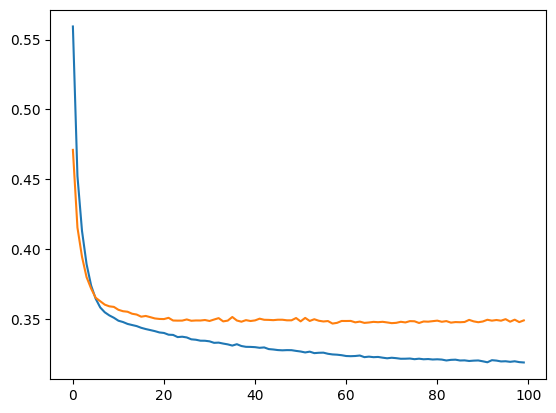

In [33]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

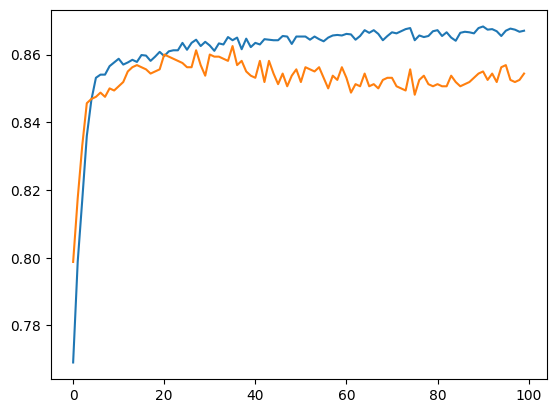

In [34]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])